In [1]:
import scipy as sp
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
data.corr()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.001864,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,...,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Status,-0.001864,1.000000,0.482136,-0.315284,-0.112252,0.596660,0.454261,0.115317,-0.076955,0.311257,...,0.220250,0.299990,0.216913,-0.148590,0.478339,-0.045801,-0.368389,-0.366751,0.478402,0.514045
Life expectancy,0.170033,0.482136,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,...,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.315284,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,...,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.112252,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,...,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.596660,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,...,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.454261,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,...,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.115317,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,...,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.076955,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,...,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.311257,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,...,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961


In [4]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
data['Hepatitis B'].value_counts()

99.0    240
98.0    210
96.0    167
97.0    155
95.0    149
       ... 
19.0      1
23.0      1
11.0      1
1.0       1
12.0      1
Name: Hepatitis B, Length: 87, dtype: int64

In [16]:
data['Status'].value_counts()

0    2426
1     512
Name: Status, dtype: int64

In [10]:
data["Status"].replace({"Developed":1}, inplace=True)
data["Status"].replace({"Developing":0}, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   int64  
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [18]:
data = data.dropna(how='any',axis=0) 

<AxesSubplot:>

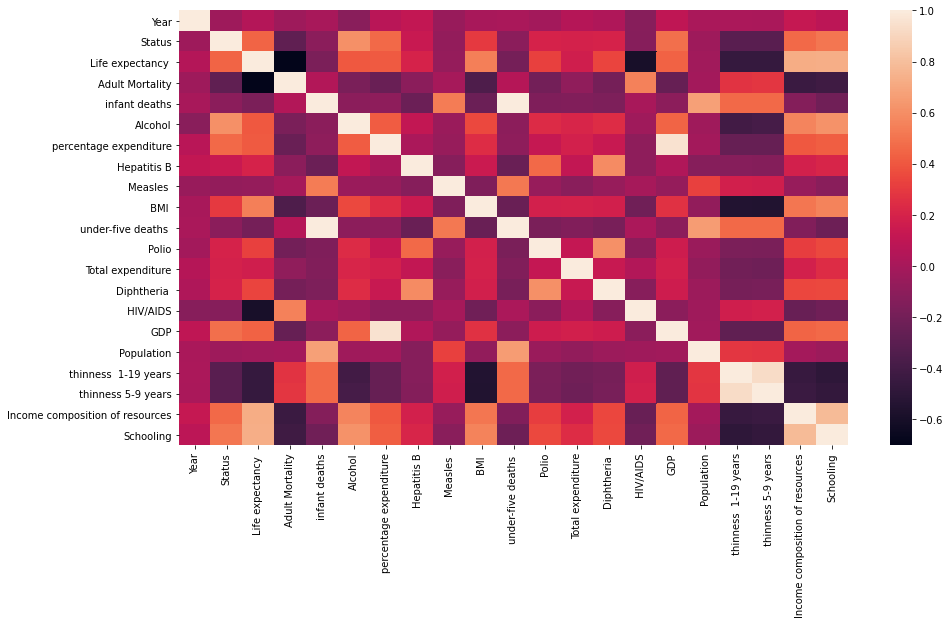

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr())

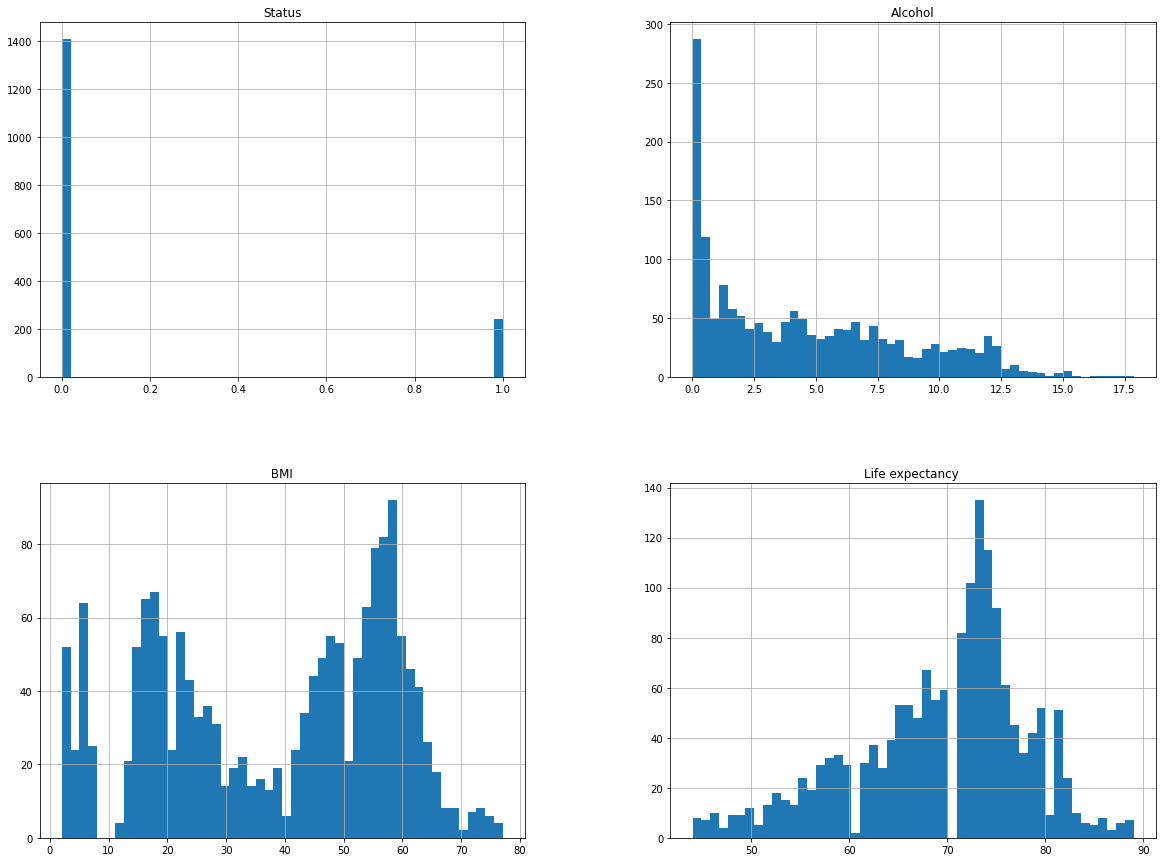

In [26]:
numerical_columns=['Status','Alcohol',' BMI ','Life expectancy ']

import matplotlib.pyplot as plt
data[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()


array([[<AxesSubplot:xlabel='Status', ylabel='Status'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Status'>,
        <AxesSubplot:xlabel=' BMI ', ylabel='Status'>,
        <AxesSubplot:xlabel='Life expectancy ', ylabel='Status'>],
       [<AxesSubplot:xlabel='Status', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Alcohol'>,
        <AxesSubplot:xlabel=' BMI ', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>],
       [<AxesSubplot:xlabel='Status', ylabel=' BMI '>,
        <AxesSubplot:xlabel='Alcohol', ylabel=' BMI '>,
        <AxesSubplot:xlabel=' BMI ', ylabel=' BMI '>,
        <AxesSubplot:xlabel='Life expectancy ', ylabel=' BMI '>],
       [<AxesSubplot:xlabel='Status', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel=' BMI ', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='Life expectancy ', ylabel='Life expectancy '>]],
      dtype=object)

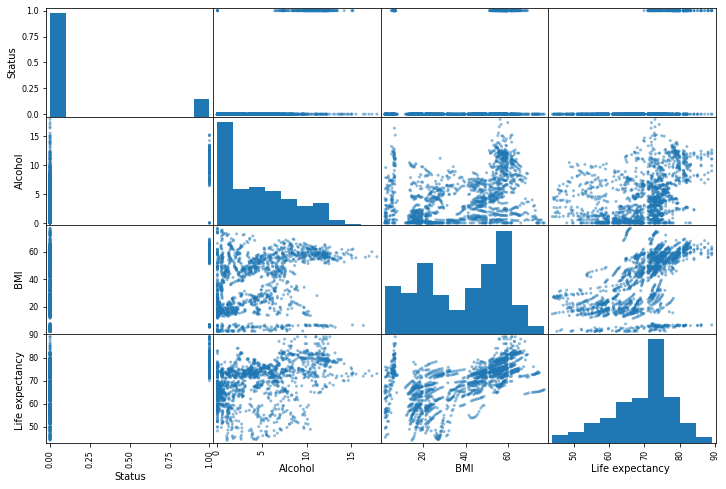

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[numerical_columns], figsize=(12, 8))

<AxesSubplot:>

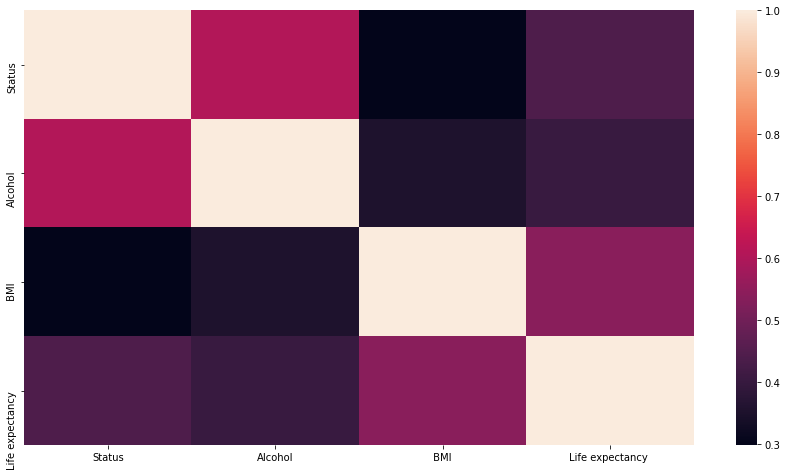

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(data[numerical_columns].corr())

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


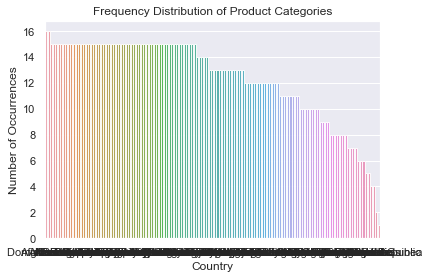

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


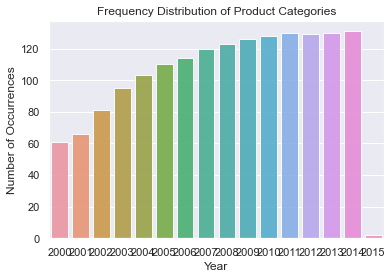

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


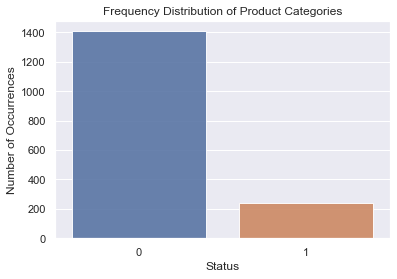

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


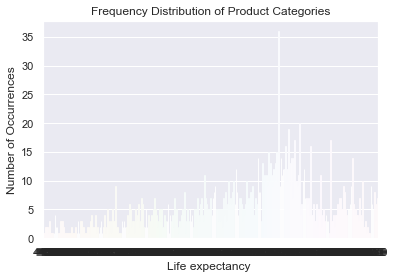

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


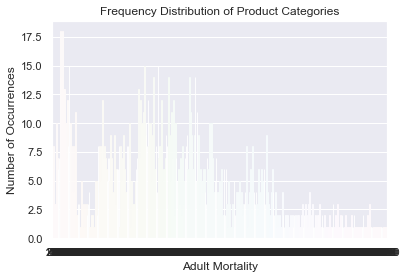

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


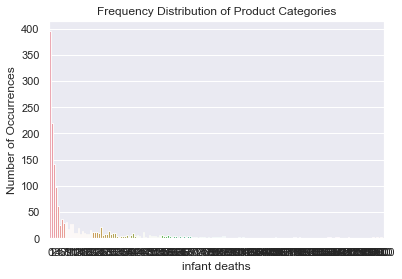

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


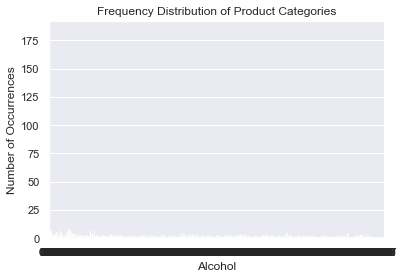

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


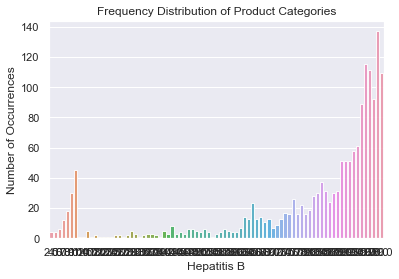

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


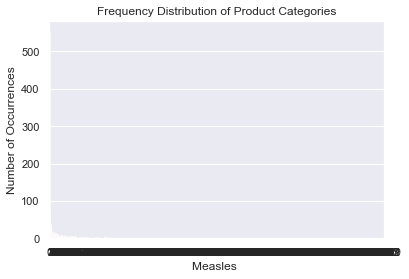

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


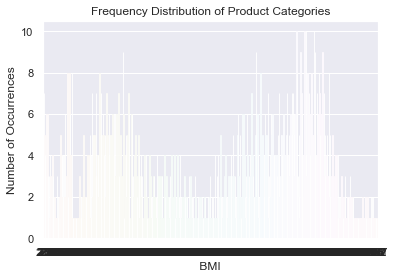

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


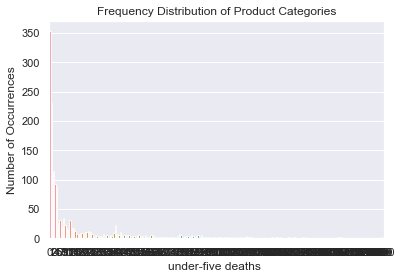

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


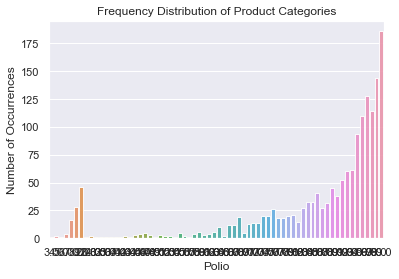

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


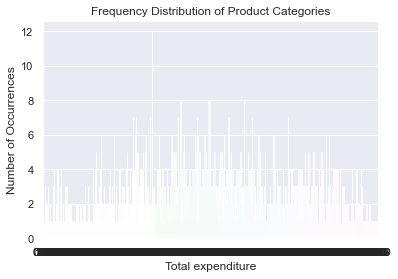

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


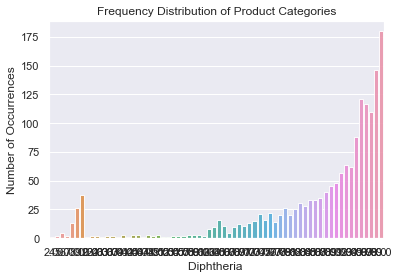

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


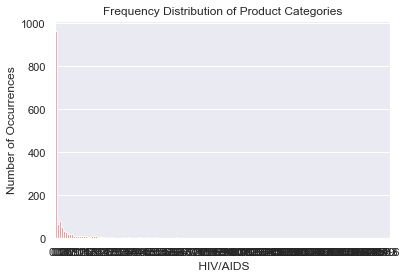

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


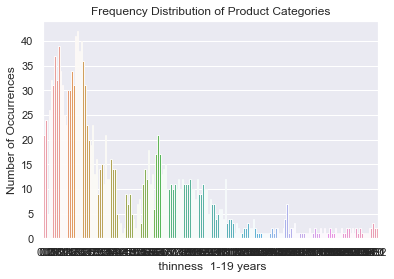

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


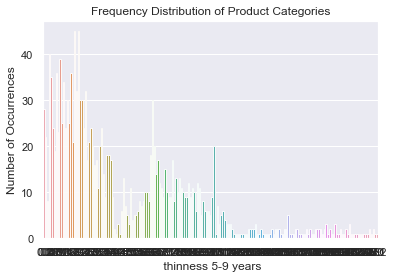

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


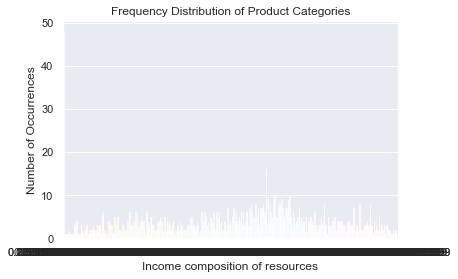

<Figure size 4320x1728 with 0 Axes>

C:\Users\ZEUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


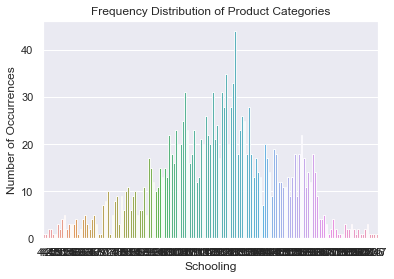

<Figure size 4320x1728 with 0 Axes>

In [35]:
for each in data.columns.to_list():
    #print(len(train_data[each].unique()),each)
    if len(data[each].unique())<1500:
        carrier_count = data[each].value_counts()
        sns.set(style="darkgrid")
        sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
        plt.title('Frequency Distribution of Product Categories')
        plt.ylabel('Number of Occurrences', fontsize=12)
        plt.xlabel(each, fontsize=12)
        plt.figure(figsize=(60,24))
        plt.show()

In [89]:
data=data[['Status','Alcohol',' BMI ','Life expectancy ']]




data["Status"].replace({"Developed":1}, inplace=True)
data["Status"].replace({"Developing":0}, inplace=True)

data = data.dropna(how='any',axis=0) 
data.info()
# valid_fraction = 0.05
# valid_size = int(len(data) * valid_fraction)

# train = data[:-2 * valid_size]
# valid = data[-2 * valid_size:-valid_size]
# test = data[-valid_size:]


# train_l = train_data[:-2 * valid_size]
# valid_l = train_data[-2 * valid_size:-valid_size]
# test_l = train_data[-valid_size:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2720 entries, 0 to 2937
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Status            2720 non-null   int64  
 1   Alcohol           2720 non-null   float64
 2    BMI              2720 non-null   float64
 3   Life expectancy   2720 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 106.2 KB


In [90]:
!pip install xgboost

In [91]:
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter


# Load the data 

X, y = data[['Status','Alcohol',' BMI ']], data['Life expectancy ']
  
# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 


xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)


# Fitting the model 
xgb_r.fit(train_X, train_y) 
  
# Predict the model 
pred = xgb_r.predict(test_X) 
pred
eval_score = mean_squared_error(test_y, pred )
eval_score

[02:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ZEUS\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


37.84770234449699

In [97]:
from sklearn.tree import DecisionTreeRegressor

classifier=DecisionTreeRegressor(max_depth=7)
classifier.fit(train_X, train_y) 


  
# Predict the model 
pred = classifier.predict(test_X) 
pred
eval_score = mean_squared_error(test_y, pred )
eval_score

32.44420532327608

In [56]:
valid[['Status','Alcohol',' BMI ']][:1]

,Status,Alcohol,BMI
2637,0,0.96,73.3


In [98]:
pred = classifier.predict([[1,5.0,52]]) 

In [99]:
pred

array([79.5])

In [100]:
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()